### Imports

In [146]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from data_management import data_loading, random_sampling
from plotting import color_plot, plot3d_dataset, plot_target_classes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data loading

In [157]:
manip_features = data_loading('cwt', 0.75)

### Select Manipulation Category

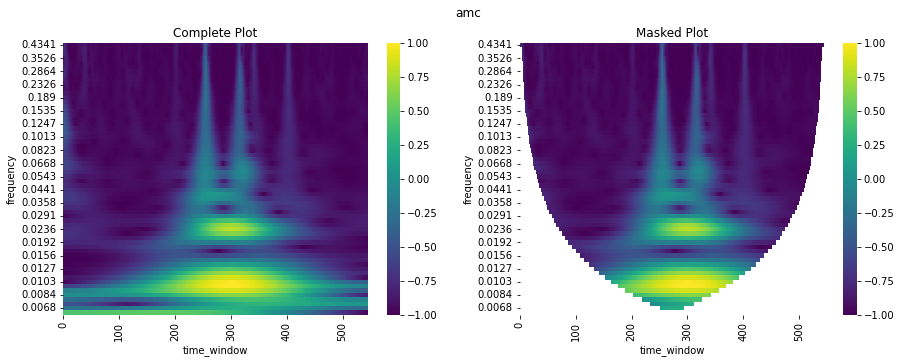

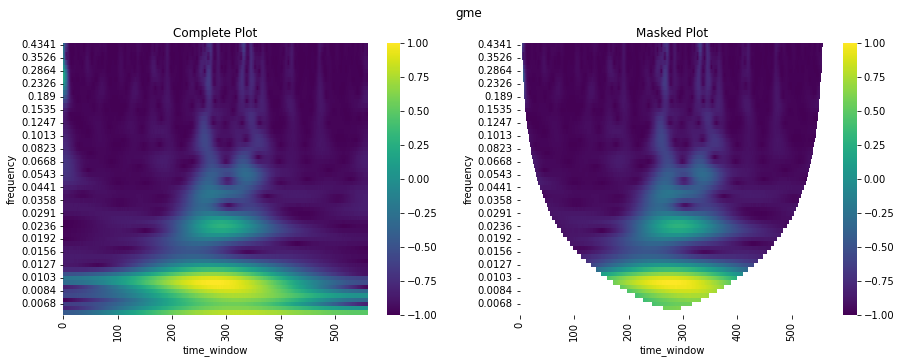

In [160]:
manip_category = 'pump_and_dump'

for stock, stock_features in manip_features[manip_category].items():
    feature_matrix = stock_features['feature_matrix']
    color_plot(feature_matrix, 4, 5, stock)

In [136]:
plot3d_dataset(feature_matrix, '3D Plot Complete Dataset', 'modulus')

### Random Sampling

In [180]:
distribution = 'negative_binomial'

X_train_list = []; y_train_list = []; X_test_list = []; y_test_list = []
for stock, stock_features in manip_features[manip_category].items():
    stock_feature_matrix = stock_features['feature_matrix']
    (stock_X_train, stock_y_train,
        stock_X_test_all, stock_y_test) = random_sampling(stock_feature_matrix, 0.6, distribution)
    X_train_list.append(stock_X_train)
    y_train_list.append(stock_y_train)
    X_test_list.append(stock_X_test_all)
    y_test_list.append(stock_y_test)

X_train_all = np.concatenate(X_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
X_test_all = np.concatenate(X_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)

In [178]:
distribution = 'negative_binomial'
X_train_all, y_train, X_test_all, y_test = random_sampling(feature_matrix, 0.6, distribution)

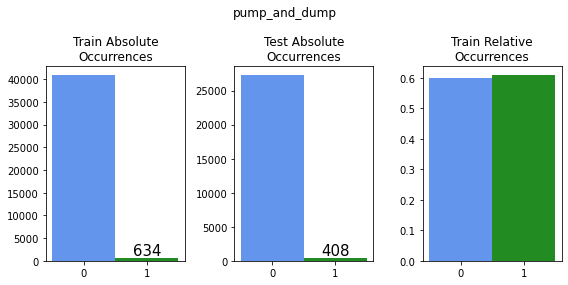

In [181]:
plot_target_classes(y_train, y_test, manip_category)

In [185]:
plot3d_dataset(X_train_all, '3D Plot Train Dataset', 'target')

In [186]:
plot3d_dataset(X_test_all, '3D Plot Test Dataset', 'target')

### Model Benchmarking

In [138]:
def evaluate_model(model, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> tuple:

    """Obtains train and test error for a given model."""

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_error = np.mean(y_pred_train != y_train)
    test_error = np.mean(y_pred_test != y_test)

    return train_error, test_error

In [143]:
# Characteristics filtering
X_train = X_train_all[:,[0, 1, 2]]
X_test = X_test_all[:,[0, 1, 2]]

In [145]:
classifiers_dict = {
    'decision_tree': DecisionTreeClassifier(max_depth=3),
    'svm_linear': SVC(kernel='linear', C=1.0),
    'svm_poly': SVC(kernel='poly', C=1.0, degree=2),
    'svm_rbf': SVC(kernel='rbf', C=1.0),
    'logistic_regression': LogisticRegression(solver='lbfgs', C=1.0)
}

errors_dict = {}
for model_name, model in classifiers_dict.items():
    train_error, test_error = evaluate_model(model, X_train, y_train, X_test, y_test)
    errors_dict[model_name] = (train_error, test_error)
    print(f'{model_name}: train error: {train_error}, test error: {test_error}')

decision_tree: train error: 0.007842025699168557, test error: 0.00935374149659864
svm_linear: train error: 0.01379440665154951, test error: 0.015660430839002266
svm_poly: train error: 0.01379440665154951, test error: 0.015660430839002266
svm_rbf: train error: 0.01379440665154951, test error: 0.015660430839002266
logistic_regression: train error: 0.01379440665154951, test error: 0.015660430839002266
